# Demo on laptopt (not VM)

You can't quite follow along and see the GUI.

In [16]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.common.exceptions import NoSuchElementException

options = Options()
#options.headless = True
#b = webdriver.Chrome(options=options, executable_path="chromium.chromedriver")
b = webdriver.Chrome(options=options)

In [2]:
import time
print("A")
time.sleep(3)
print("B")

A
B


# Step 1: wait for the table to grab the HTML

In [3]:
b.get("https://tyler.caraza-harter.com/cs320/tricky/page1.html")
#print(b.page_source[:100])
# polling
def wait_for_element(elem_id):
    max_seconds = 10
    for i in range(max_seconds * 10):
        time.sleep(0.1)
        try:
            elem = b.find_element_by_id(elem_id)
            break
        except NoSuchElementException:
            print("not ready yet")
    return elem

wait_for_element("coords")
html = b.page_source

not ready yet
not ready yet
not ready yet
not ready yet
not ready yet
not ready yet
not ready yet
not ready yet
not ready yet


# Step 2: convert HTML to a table

In [4]:
from bs4 import BeautifulSoup # let us search for elements in HTML too

In [5]:
# we'll create a bs4 tree using the HTML selenium gave us
page = BeautifulSoup(b.page_source, "html.parser")
type(page)

bs4.BeautifulSoup

In [6]:
# page.find("TAG") -- get the first instance of that TAG
tbls = page.find_all("table")
assert len(tbls) == 2

In [7]:
import pandas as pd
tbl = tbls[-1]
rows = []
for tr in tbl.find_all("tr"):
    row = [cell.get_text() for cell in tr.find_all("td")]
    rows.append(row)
pd.DataFrame(rows[1:], columns=rows[0])

,x,y
0,0,1
1,2,3
2,4,5
3,6,7
4,8,9
5,10,11
6,12,13
7,14,15
8,16,17
9,18,19


# Demo 2: clicks

In [25]:
b.get("https://tyler.caraza-harter.com/cs320/tricky/page2.html")

while True:
    try:
        btn = b.find_element_by_id("more")
    except NoSuchElementException:
        break
    btn.click()

In [28]:
print(b.page_source[-300:])

d>08/16/1992</td><td>08/29/1992</td><td>175</td><td>27.3B</td><td>65</td></tr><tr><td>Erin</td><td>07/31/1995</td><td>08/06/1995</td><td>100</td><td>700M</td><td>6</td></tr><tr><td>Earl</td><td>08/31/1998</td><td>09/08/1998</td><td>100</td><td>79M</td><td>3</td></tr></table>

    
  

</body></html>


# Demo 3: Typing a Password

In [30]:
options = Options()
b = webdriver.Chrome(options=options)

url = "https://tyler.caraza-harter.com/cs320/tricky/page3.html"
b.get(url)

In [37]:
pwd_box = b.find_element_by_id("password")
login_btn = b.find_element_by_id("login_btn")

# 1. type password
pwd_box.send_keys("fido")
# 2. click a button
login_btn.click()

# Demo 4: Plot Hurricanes per Year

In [40]:
url = "https://tyler.caraza-harter.com/cs320/tricky/page4.html"
b.get(url)

In [52]:
year_box = b.find_element_by_id("year")
search_btn = b.find_element_by_id("search_btn")

def get_year_count(year):
    year_box.clear()
    year_box.send_keys(str(year))
    search_btn.click()
    # TODO: return hurricanes in a year
    trs = b.find_elements_by_tag_name("tr")
    assert len(trs) >= 1
    return len(trs) - 1
get_year_count(1950)

3

In [60]:
import pandas as pd
s = pd.Series(dtype=float)
for year in range(1950, 2020):
    s.loc[year] = get_year_count(year)
s

1950    3
1951    0
1952    1
1953    2
1954    2
       ..
2015    2
2016    2
2017    4
2018    4
2019    0
Length: 70, dtype: int64

<AxesSubplot:>

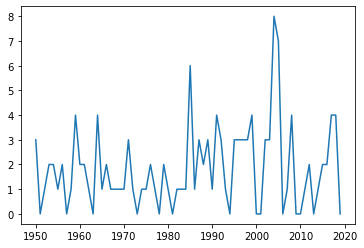

In [61]:
s.plot.line()

# BFS for webpages

In [62]:
start_url = "https://tyler.caraza-harter.com/cs320/crawl/practice1/1.html"

In [63]:
b.get(start_url)

In [71]:
from collections import deque

# BFS
visit_todo = deque([start_url])
added = set([start_url])

while len(visit_todo) > 0:
    # do the work
    url = visit_todo.popleft()
    print(url)
    b.get(url) # visit it!
    
    # record new tasks
    links = b.find_elements_by_tag_name("a")
    for link in links:
        new_url = link.get_attribute("href")
        if not new_url in added:
            visit_todo.append(new_url)
            added.add(new_url)
            
    time.sleep(1)

https://tyler.caraza-harter.com/cs320/crawl/practice1/1.html
https://tyler.caraza-harter.com/cs320/crawl/practice1/2.html
https://tyler.caraza-harter.com/cs320/crawl/practice1/3.html
https://tyler.caraza-harter.com/cs320/crawl/practice1/4.html
https://tyler.caraza-harter.com/cs320/crawl/practice1/5.html
https://tyler.caraza-harter.com/cs320/crawl/practice1/6.html


In [ ]:
# bs4
[td.get_text() for td in tr.find_all("td")]

# selenium
????